# Correction TP: Decision Trees

### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from sklearn import tree, datasets
from sklearn.model_selection import (cross_val_score, learning_curve, 
                                     ShuffleSplit)
from tptreesource import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                            rand_checkers, rand_clown, plot_2d,
                            frontiere_new)

### Settings

In [2]:
# Plot
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
# Seaborn
sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
# Seed initialization
np.random.seed(seed=1)
# For saving files
saving_activated = True # False

### Data Generation: Examples
From rand_gauss

In [3]:
n = 10
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)

array([[ 2.62434536,  0.38824359],
       [ 0.47182825, -0.07296862],
       [ 1.86540763, -1.3015387 ],
       [ 2.74481176,  0.2387931 ],
       [ 1.3190391 ,  0.75062962],
       [ 2.46210794, -1.06014071],
       [ 0.6775828 ,  0.61594565],
       [ 2.13376944, -0.09989127],
       [ 0.82757179,  0.12214158],
       [ 1.04221375,  1.58281521]])

From rand_bi_gauss

In [4]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
data1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

From rand_tri_gauss

In [5]:
n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
data2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

From rand_clown

In [6]:
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
data3 = rand_clown(n1, n2, sigmas1, sigmas2)

From rand_checkers

In [7]:
n1 = 114
n2 = 114
n3 = 114
n4 = 114
sigma = 0.1
data4 = rand_checkers(n1, n2, n3, n4, sigma)

### Displaying labeled data

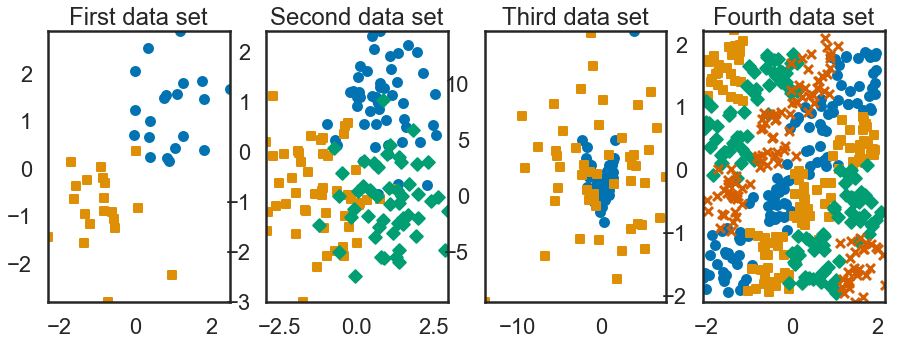

In [8]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(data1[:, :2], data1[:, 2], w=None)
plt.subplot(142)
plt.title('Second data set')
plot_2d(data2[:, :2], data2[:, 2], w=None)
plt.subplot(143)
plt.title('Third data set')
plot_2d(data3[:, :2], data3[:, 2], w=None)
plt.subplot(144)
plt.title('Fourth data set')
plot_2d(data4[:, :2], data4[:, 2], w=None)

### 2. Create an object 'decision tree' and specify its classification criterion, such as the Gini index or the entropy; use function 'DecisionTreeClassifier'

In [9]:
dt_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=None)

Fit for a data set

In [10]:
data = rand_checkers(114, 114, 114, 114, sigma)
n_samples = len(data)
X = data[:, :2]
Y = data[:, 2].astype(int)
# Fit both classifiers
dt_gini.fit(X, Y)
dt_entropy.fit(X, Y)
# Print their outputs
print("gini")
print(dt_gini.get_params())
print(dt_gini.score(X, Y))
print("entropy")
print(dt_entropy.get_params())
print(dt_entropy.score(X, Y))

gini
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
1.0
entropy
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
1.0


Show the scores as functions of the 'max_depth' paremeter

Separation rules using entropy as impurity criterion:


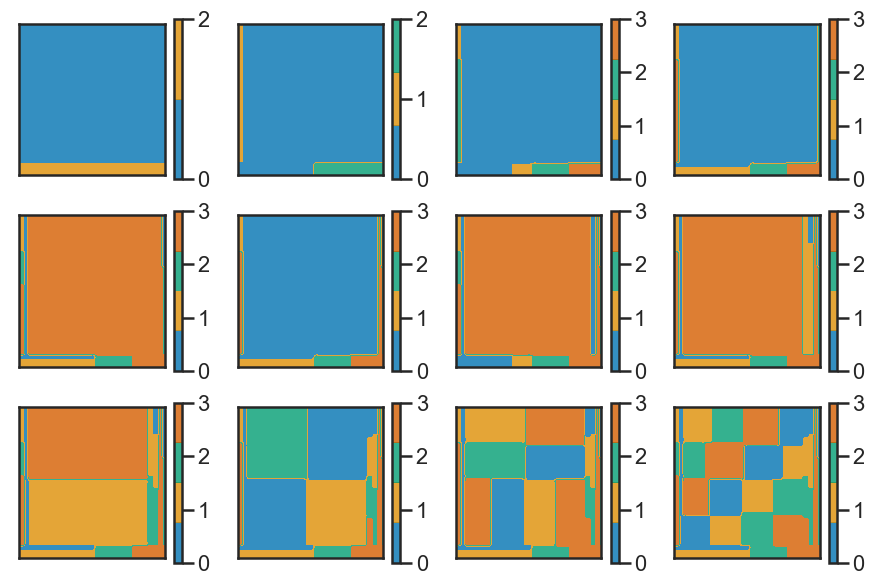

In [11]:
dmax = 12
scores_entropy = np.zeros(dmax)
scores_gini = np.zeros(dmax)
# Plot separation rules using entropy
print("Separation rules using entropy as impurity criterion:")
plt.close(2)
plt.figure(2, figsize=(15, 10))
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    dt_entropy.fit(X, Y)
    scores_entropy[i] = dt_entropy.score(X, Y)
    plt.subplot(3, 4, i + 1)
    frontiere_new(lambda x: dt_entropy.predict(x.reshape((1, -1))), X, Y, step=50, samples=False)
plt.show()
plt.close(3)
print(" ")

Separation rules using Gini index as impurity criterion:


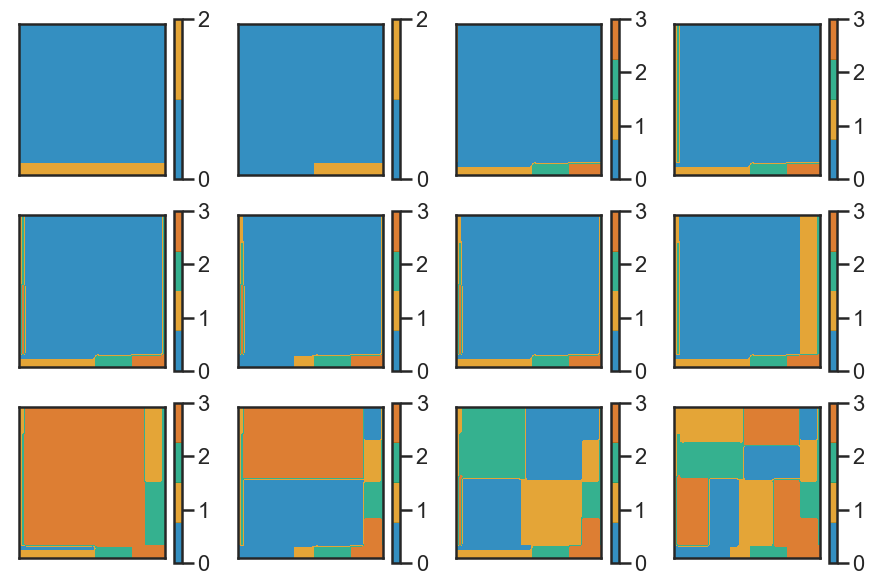

In [12]:
# Plot separation rules using Gini index
print("Separation rules using Gini index as impurity criterion:")
plt.figure(3, figsize=(15, 10))
for i in range(dmax):
    dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i + 1)
    dt_gini.fit(X, Y)
    scores_gini[i] = dt_gini.score(X, Y)
    plt.subplot(3, 4, i + 1)
    # Set 'samples=True' to plot the data along with the frontier
    frontiere_new(lambda x: dt_gini.predict(x.reshape((1, -1))), X, Y, step=50, samples=False)
plt.show()
plt.close(4)

Entropy produced scores: [0.27008929 0.28571429 0.30803571 0.31473214 0.32366071 0.32366071
 0.33482143 0.34821429 0.38616071 0.55357143 0.61607143 0.91517857]
Gini-index produced scores: [0.27008929 0.27901786 0.29017857 0.30133929 0.31026786 0.31473214
 0.32142857 0.33705357 0.37053571 0.421875   0.56919643 0.63839286]


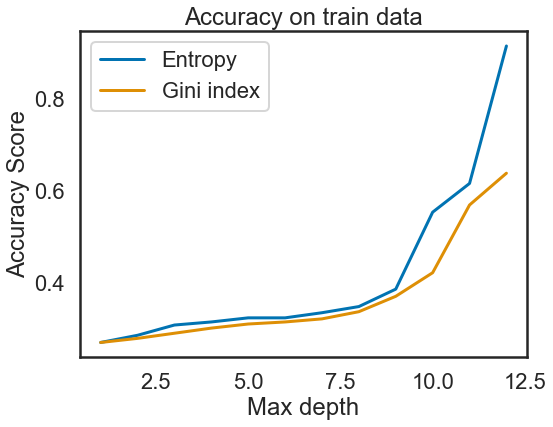

In [13]:
# Summarize the results:
#  - in print
print('Entropy produced scores: {}'.format(scores_entropy))
print('Gini-index produced scores: {}'.format(scores_gini))
#  - on graphics
plt.figure(4)
plt.plot(np.arange(1, dmax + 1), scores_entropy, label='Entropy')
plt.plot(np.arange(1, dmax + 1), scores_gini, label='Gini index')
plt.title('Accuracy on train data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()

### 3. Show the frontier and report the training set classificatino error for the best tree depth

Best performance on training data using entropy: 91.52%


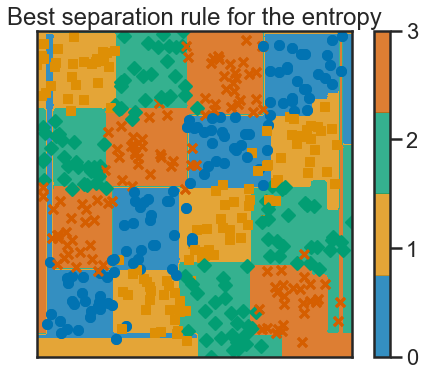

Best performance on training data using Gini index: 63.84%


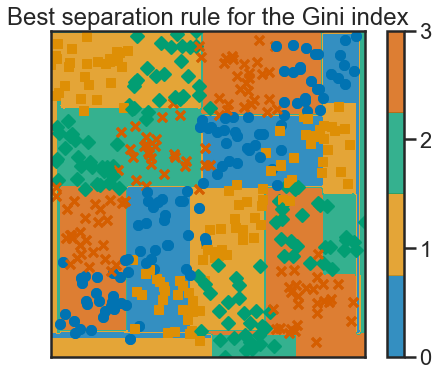

In [14]:
# For the entropy
dt_entropy.max_depth = np.argmax(scores_entropy) + 1
dt_entropy.fit(X, Y)
plt.close(4)
print('Best performance on training data using entropy: {:.2%}'.format(dt_entropy.score(X, Y)))
plt.figure(4)
plot_2d(X, Y)
plt.title("Best separation rule for the entropy")
frontiere_new(lambda x: dt_entropy.predict(x.reshape((1, -1))), X, Y, step=100)
# For the Gini index
dt_gini.max_depth = np.argmax(scores_gini) + 1
dt_gini.fit(X, Y)
plt.show()
plt.close(5)
print('Best performance on training data using Gini index: {:.2%}'.format(dt_gini.score(X, Y)))
plt.figure(5)
plot_2d(X, Y)
plt.title("Best separation rule for the Gini index")
frontiere_new(lambda x: dt_gini.predict(x.reshape((1, -1))), X, Y, step=100)
plt.show()

### 4. Export the trees

In [15]:
tree.export_graphviz(dt_entropy, out_file="myEntropyTree.dot", filled=True)
os.system("dot -Tpdf myEntropyTree.dot -o myEntropyTree.pdf")
os.system("evince myEntropyTree.pdf")
tree.export_graphviz(dt_gini, out_file="myGiniTree.dot", filled=True)
os.system("dot -Tpdf myGiniTree.dot -o myGiniTree.pdf")
os.system("evince myGiniTree.pdf")

32512

### 5. Test the classifier on new data

Generate the test data

In [16]:
data_test = rand_checkers(40, 40, 40, 40, sigma)
X_test = data_test[:, :2]
Y_test = data_test[:, 2].astype(int)

Test on all previous classifiers

Separation rules using entropy as impurity criterion:


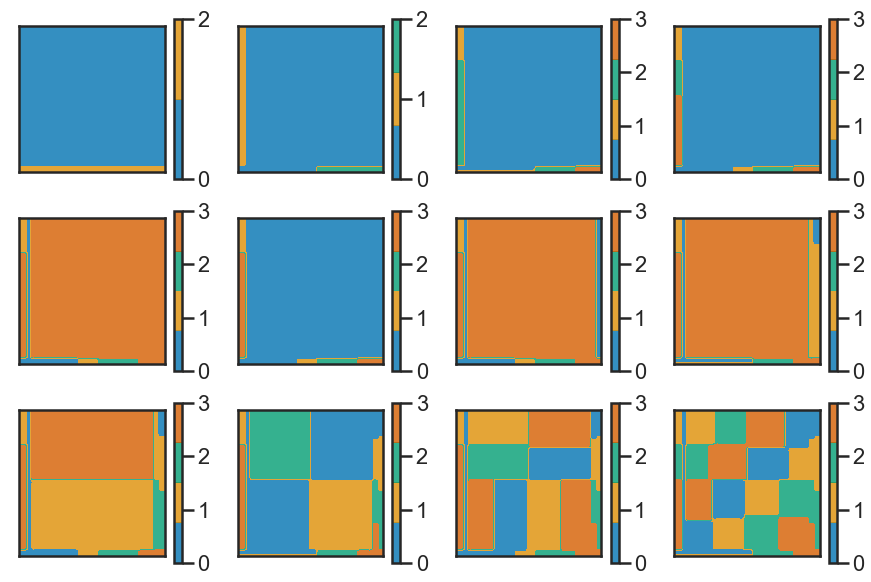

In [17]:
dmax = 12
scores_entropy = np.zeros(dmax)
scores_gini = np.zeros(dmax)
# Plot separation rules using entropy
print("Separation rules using entropy as impurity criterion:")
plt.close(2)
plt.figure(2, figsize=(15, 10))
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    dt_entropy.fit(X, Y)
    scores_entropy[i] = dt_entropy.score(X_test, Y_test)
    plt.subplot(3, 4, i + 1)
    frontiere_new(lambda x: dt_entropy.predict(x.reshape((1, -1))), X_test, Y_test, step=50, samples=False)
plt.show()
plt.close(3)
print(" ")

Separation rules using Gini index as impurity criterion:


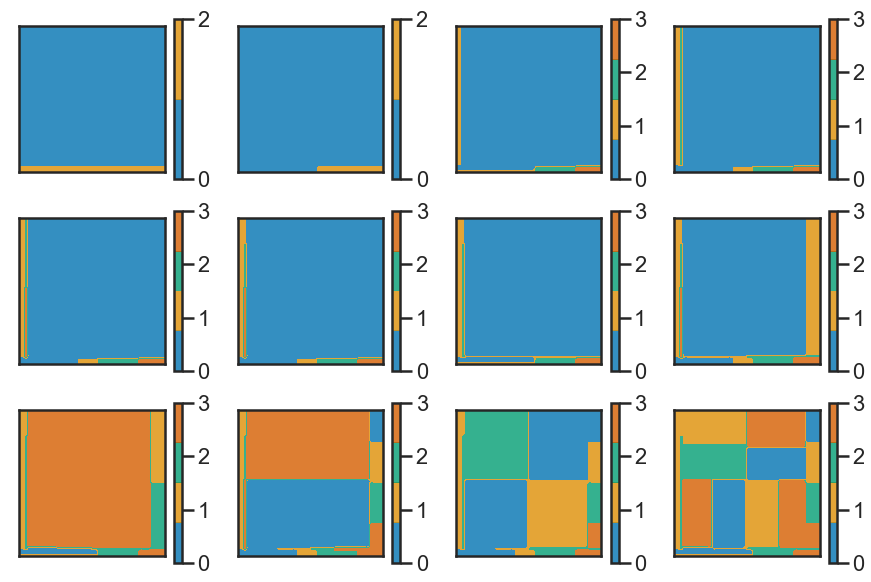

In [18]:
# Plot separation rules using Gini index
print("Separation rules using Gini index as impurity criterion:")
plt.figure(3, figsize=(15, 10))
for i in range(dmax):
    dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i + 1)
    dt_gini.fit(X, Y)
    scores_gini[i] = dt_gini.score(X_test, Y_test)
    plt.subplot(3, 4, i + 1)
    # Set 'samples=True' to plot the data along with the frontier
    frontiere_new(lambda x: dt_gini.predict(x.reshape((1, -1))), X_test, Y_test, step=50, samples=False)
plt.show()
plt.close(4)

Entropy produced scores: [0.25    0.2375  0.26875 0.26875 0.26875 0.25625 0.28125 0.29375 0.30625
 0.41875 0.475   0.75625]
Gini-index produced scores: [0.25    0.25    0.25625 0.25625 0.25625 0.25625 0.25625 0.25625 0.2875
 0.35    0.45    0.4875 ]


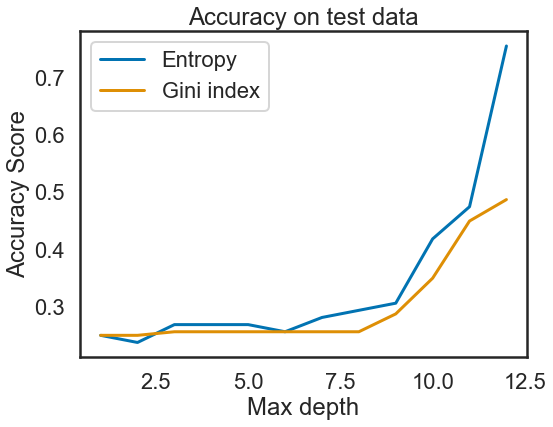

In [19]:
# Summarize the results:
#  - in print
print('Entropy produced scores: {}'.format(scores_entropy))
print('Gini-index produced scores: {}'.format(scores_gini))
#  - on graphics
plt.figure(4)
plt.plot(np.arange(1, dmax + 1), scores_entropy, label='Entropy')
plt.plot(np.arange(1, dmax + 1), scores_gini, label='Gini index')
plt.title('Accuracy on test data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()

### 6. Classify digits data set

Load and split the data

In [20]:
digits = datasets.load_digits()
n_samples = len(digits.data)
ids_permuted = np.random.permutation(n_samples)
X_train = digits.data[ids_permuted[0:int(np.floor(n_samples * 0.8))]]
Y_train = digits.target[ids_permuted[0:int(np.floor(n_samples * 0.8))]]
X_test = digits.data[ids_permuted[int(np.floor(n_samples * 0.8)):]]
Y_test = digits.target[ids_permuted[int(np.floor(n_samples * 0.8)):]]
print('Training data contains {} observations.'.format(X_train.shape[0]))
print('Test data contains {} observations.'.format(X_test.shape[0]))

Training data contains 1437 observations.
Test data contains 360 observations.


We do for entropy only here (results for Gini are worse):

Construct classifiers using train data

 
Entropy produced scores on train data: [0.19763396 0.3736952  0.53653445 0.66805846 0.76965901 0.87613083
 0.93736952 0.96868476 0.98956159 0.99791232 1.         1.        ]


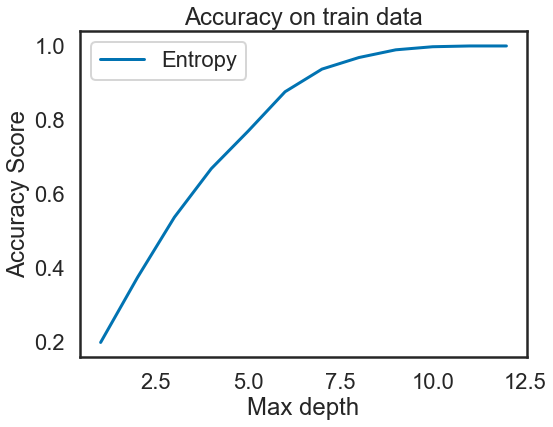

Best performance on training data using entropy: 100.00%
Best tree depth: 11


In [21]:
dmax = 12
scores_entropy_train = np.zeros(dmax)
scores_entropy_test = np.zeros(dmax)
# Construct separation rules using entropy
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    dt_entropy.fit(X_train, Y_train)
    scores_entropy_train[i] = dt_entropy.score(X_train, Y_train)
    scores_entropy_test[i] = dt_entropy.score(X_test, Y_test)
print(" ")
# Summarize the results:
#  - in print
print('Entropy produced scores on train data: {}'.format(scores_entropy_train))
#  - on graphics
plt.figure(5)
plt.plot(np.arange(1, dmax + 1), scores_entropy_train, label='Entropy')
plt.title('Accuracy on train data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
plt.close(5)
# Performance of the best separation
dt_entropy.max_depth = np.argmax(scores_entropy_train) + 1
dt_entropy.fit(X_train, Y_train)
print('Best performance on training data using entropy: {:.2%}'.format(dt_entropy.score(X_train, Y_train)))
print('Best tree depth: {}'.format(dt_entropy.max_depth))

Show results on test data

Entropy produced scores on test data: [0.19166667 0.36111111 0.55       0.66111111 0.74444444 0.825
 0.85555556 0.875      0.88333333 0.88055556 0.88333333 0.87777778]


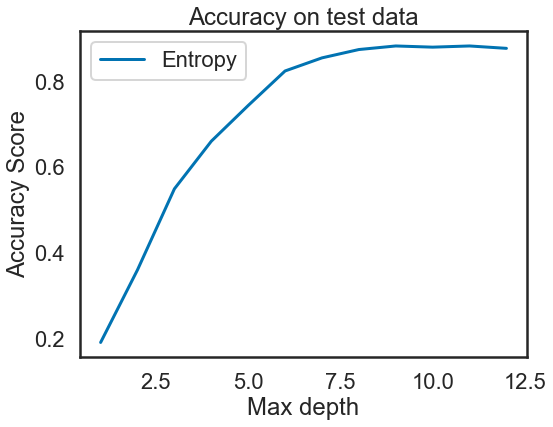

Performance of the train-best classifier on test data using entropy: 87.50%
Best tree depth: 11


In [22]:
# Summarize the results:
#  - in print
print('Entropy produced scores on test data: {}'.format(scores_entropy_test))
#  - on graphics
plt.figure(6)
plt.plot(np.arange(1, dmax + 1), scores_entropy_test, label='Entropy')
plt.title('Accuracy on test data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
plt.close(6)
# Performance of the best separation
dt_entropy.max_depth = np.argmax(scores_entropy_train) + 1
dt_entropy.fit(X_train, Y_train)
print('Performance of the train-best classifier on test data using entropy: {:.2%}'.format(dt_entropy.score(X_test, Y_test)))
print('Best tree depth: {}'.format(dt_entropy.max_depth))

### 7. Choose maximum tree depth by cross-validation

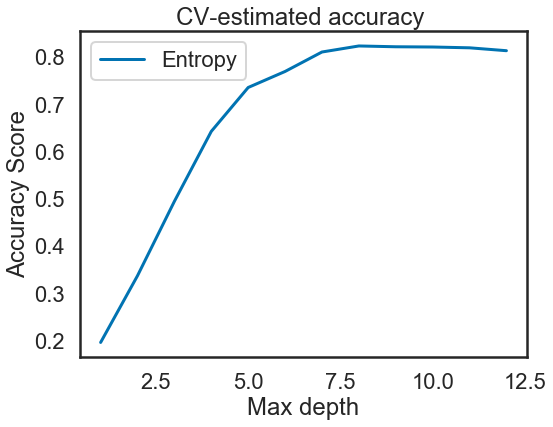

CV-estimated scores: [0.1964401  0.33774984 0.49527312 0.64333023 0.73625388 0.77018312
 0.81137492 0.82416822 0.82247672 0.82196151 0.82026381 0.81412787]
Best CV-chosen tree depth: 8


In [23]:
dmax = 12
scores_entropy_cv = np.zeros(dmax)
# Construct separation rules using entropy
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    scores = cross_val_score(dt_entropy, digits.data, digits.target, cv=10)
    scores_entropy_cv[i] = scores.mean()
plt.figure(7)
plt.plot(np.arange(1, dmax + 1), scores_entropy_cv, label='Entropy')
plt.title('CV-estimated accuracy ')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
plt.close(7)
# Summarize the results:
#  - in print
print('CV-estimated scores: {}'.format(scores_entropy_cv))
print('Best CV-chosen tree depth: {}'.format(np.argmax(scores_entropy_cv) + 1))

### 8. Plot the learning curve

The function

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Plot the learning curve for the classification tree

In [ ]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
title = "Learning curves (Classification tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=500, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()